<a href="https://colab.research.google.com/github/juanmatarga/UCEMA/blob/main/The_Phillips_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LA CURVA DE PHILLIPS: ANÁLISIS**

**CARGA DE BASE DE DATOS Y SCATTER PLOT: INFLACIÓN Y DESEMPLEO POR PAÍS**

*En esta primera parte, cargamos la base de datos y le pedimos al programa que la lea y la guarde en "database", luego definimos paises y columnas para poder realizar nuestro analisis, y creamos una función para poder graficar un scatter plot de cada país.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

database = pd.read_excel("bdd_phillips_trabajo_final.xlsx", engine="openpyxl")

paises = ["Estados Unidos", "Reino Unido", "Alemania"]
columnas = [["usi", "usu"], ["uki", "uku"], ["gi", "gu"]]

for pais, columns in zip(paises, columnas):
    pais_data = database[columns]

    plt.scatter(pais_data[columns[1]], pais_data[columns[0]])

    plt.legend()
    plt.xlabel("Desempleo (%)")
    plt.ylabel("Inflación (%)")
    plt.title(f"{pais}: Inflación vs. Desempleo")
    plt.figure(figsize=(19.2, 10.8))
    plt.show()


 **GRÁFICO DE LINEAS: EVOLUCIÓN DE INFLACIÓN Y DESEMPLEO A TRAVÉS DEL TIEMPO POR PAÍS**

 *Hicimos estos gráficos para poder demostrar visualmente la evolución de cada variable a través del tiempo por país, y poder identificar los periodos en los que existe una correlación inversa entre inflación y desempleo.*

In [ ]:
for pais, columns in zip(paises, columnas):
    pais_data = database[["Año"] + columns]

    plt.figure(figsize=(10, 6))
    plt.plot(pais_data["Año"], pais_data[columns[0]], label="Inflación")
    plt.plot(pais_data["Año"], pais_data[columns[1]], label="Desempleo")

    plt.legend()
    plt.xlabel("Año")
    plt.ylabel("Porcentaje (%)")
    plt.title(f"Evolución de Inflación y Desempleo en {pais}")
    plt.grid(True)
    plt.show()

**GRÁFICOS DE LÍNEAS: ÍNDICE DE CORRELACIÓN ENTRE INFLACIÓN Y DESEMPLEO A TRAVÉS DEL TIEMPO POR PAÍS**

*En estos gráficos, analizamos la evolución del índice de correlación entre inflación y desempleo a través del tiempo por país. De cumplirse la curva de Phillips, el índice de correlación debería de estar muy cerca de -1 (correlación inversa perfecta). El índice de correlación es recalculado para cada año, sumando a ese año los nuevos datos de inflación y desempleo.*

In [ ]:
for pais, columns in zip(paises, columnas):
    tasas_inflacion = database[columns[0]].tolist()
    tasas_desempleo = database[columns[1]].tolist()

    correlaciones = [pd.Series(tasas_inflacion[i:], dtype="float64").corr(pd.Series(tasas_desempleo[:-i], dtype="float64")) for i in range(len(tasas_inflacion))]

    plt.figure(figsize=(10, 6))
    plt.plot(database["Año"], correlaciones, label="Correlación", marker="o")

    plt.ylim(-1, 1)

    plt.xlabel("Año")
    plt.ylabel("Correlación")
    plt.title(f"Correlación entre Tasa de Desempleo y Tasa de Inflación en {pais}")

    plt.grid(True)
    plt.legend()
    plt.show()


**GRÁFICO DE BARRAS: ÍNDICE DE CORRELACIÓN TOTAL POR PAÍS**

*En este último gráfico, hicimos un analisis total de los datos entre 1909-2009, para ver cuanto fue el índice de correlación promedio por país, y lo graficamos en un gráfico de barras para compararlos visualmente.*

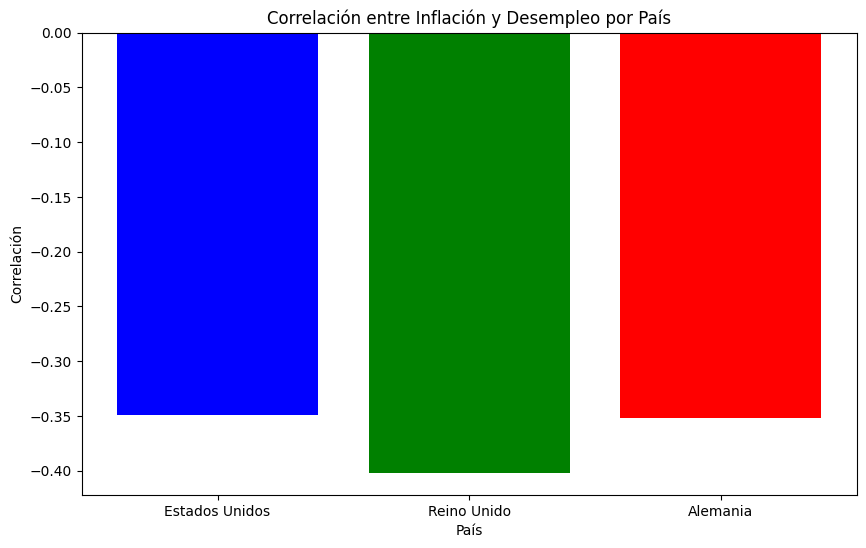

In [ ]:
correlation_us = database["usi"].corr(database["usu"])
correlation_uk = database["uki"].corr(database["uku"])
correlation_germany = database["gi"].corr(database["gu"])

paises = ["Estados Unidos", "Reino Unido", "Alemania"]
correlaciones = [correlation_us, correlation_uk, correlation_germany]

plt.figure(figsize=(10, 6))
plt.bar(paises, correlaciones, color=["blue", "green", "red"])
plt.xlabel("País")
plt.ylabel("Correlación")
plt.title("Correlación entre Inflación y Desempleo por País")

plt.show()